<a href="https://colab.research.google.com/github/KajalRathod27/PRODIGY_ML_01/blob/main/HousePricesPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/AmesHousing.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [3]:
df[['SalePrice', 'Gr Liv Area', 'Bedroom AbvGr', 'Full Bath', 'Half Bath']].describe()

,SalePrice,Gr Liv Area,Bedroom AbvGr,Full Bath,Half Bath
count,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,180796.060068,1499.690444,2.854266,1.566553,0.379522
std,79886.692357,505.508887,0.827731,0.552941,0.502629
min,12789.000000,334.000000,0.000000,0.000000,0.000000
25%,129500.000000,1126.000000,2.000000,1.000000,0.000000
50%,160000.000000,1442.000000,3.000000,2.000000,0.000000
75%,213500.000000,1742.750000,3.000000,2.000000,1.000000
max,755000.000000,5642.000000,8.000000,4.000000,2.000000


In [6]:
# Drop rows with missing target value
df = df.dropna(subset=['SalePrice'])

# Fill any missing values in relevant columns with median values
df['Gr Liv Area'] = df['Gr Liv Area'].fillna(df['Gr Liv Area'].median())
df['Bedroom AbvGr'] = df['Bedroom AbvGr'].fillna(df['Bedroom AbvGr'].median())
df['Full Bath'] = df['Full Bath'].fillna(df['Full Bath'].median())
df['Half Bath'] = df['Half Bath'].fillna(df['Half Bath'].median())

# Combine FullBath and HalfBath into TotalBath
df['Total Bath'] = df['Full Bath'] + (0.5 * df['Half Bath'])


In [8]:
X = df[['Gr Liv Area', 'Bedroom AbvGr', 'Total Bath']]
y = df['SalePrice']


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [11]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE) and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 3157413030.846381
R-squared: 0.6061871961283187


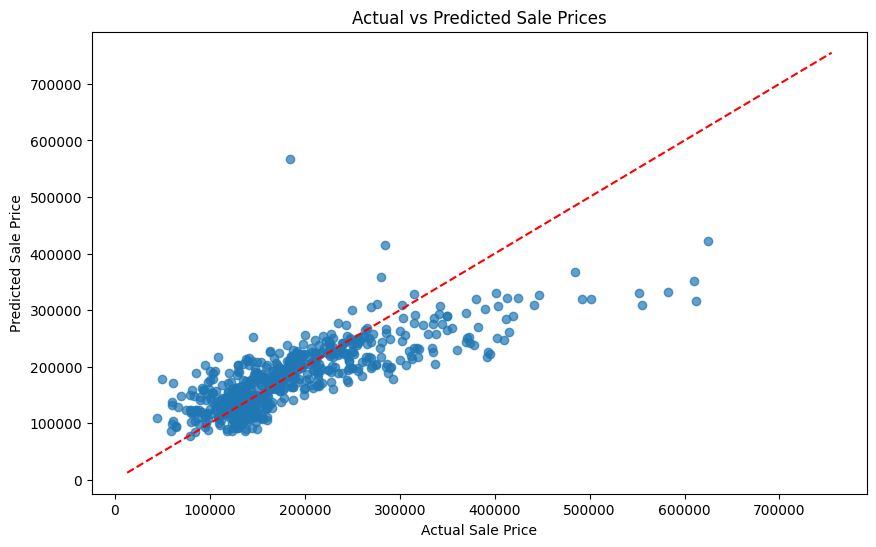

In [12]:
# Plot predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Actual vs Predicted Sale Prices')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Line for perfect prediction
plt.show()


In [13]:
# Example single input data for prediction
single_input = [[1500, 3, 2]]  # Format: [Gr Liv Area, Bedroom Abv Gr, Total Bath]

# Make a single prediction
single_prediction = model.predict(single_input)

# Display the result
print(f'Predicted Sale Price: ${single_prediction[0]:.2f}')

Predicted Sale Price: $180863.26


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
